# Task 1: Линейная диаграмма

Как обычно, давайте начнем с простой задачи. Если вы еще ни разу не рисовали графики в Python, пришло время заняться этим. Помните, как мы анализировали страницу новостной ленты? Задумывались ли вы о том, как часто посещали эту страницу пользователи?

## 1. Установите соединение с базой данных (как и в прошлом проекте).

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import sqlite3 as s
conn = s.connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite') 

Mounted at /content/drive


## 2. Выполните запрос, который достает `datetime` из таблицы `pageviews`; выбирайте только пользователей, а не администраторов.

In [3]:
datetime = pd.io.sql.read_sql( con = conn,
                    sql = 'SELECT datetime FROM pageviews \
                    WHERE uid LIKE "user__%"',
                    parse_dates = ['datetime'])
datetime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  987 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.8 KB


## 3. Используя библиотеку Pandas, создайте новый датафрейм, в котором посещения страницы будут подсчитаны и сгруппированы по дате.

In [4]:
daily = datetime
daily['date'] = daily.datetime.dt.date
daily = daily.groupby('date', as_index=False)\
    .agg({'datetime': 'count'})\
    .rename(columns={'datetime': 'views'})
daily.head()

,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1


## 3. Используя метод `.plot()` библиотеки Pandas, создайте график.
* Размер шрифта — 8.
* figsize — 15,8.
* Название графика — «Число просмотров в день».
Обратите внимание на поворот надписей на оси x на графике ниже.

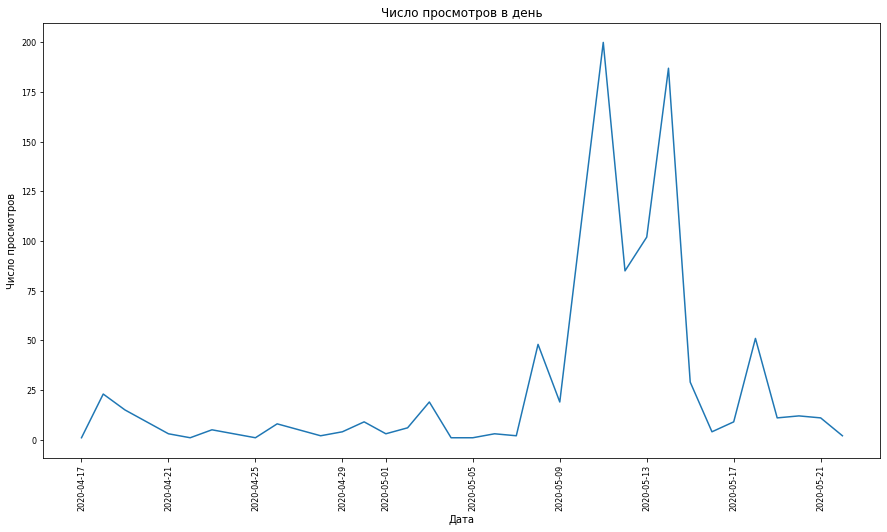

In [5]:
daily.plot(
    x = 'date',
    y = 'views',
    kind = 'line',
    figsize = (15,8),
    title = 'Число просмотров в день',
    legend = False,
    xlabel = "Дата",
    ylabel = 'Число просмотров',
    rot = 90,
    fontsize = 8
)

## 5. Закройте соединение с базой данных.

In [6]:
conn.close()